<a href="https://colab.research.google.com/github/paulopetrillo/PROJETO_IFMA_SOFTEX/blob/main/Multinomial_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importa a biblioteca numpy
import numpy as np
print(np.__version__)

1.23.5


In [2]:
# importa biblioteca Pandas.
import pandas as pd
print(pd.__version__)

1.5.3


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# pacotes para regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# # Grava datDataFrame_Geral em Googe drive
# #drive.mount('/content/drive')
# DataFrame_Geral.to_csv('./drive/MyDrive/DataFrame_Geral.csv')
# DataFrame_Geral= pd.read_csv("./drive/MyDrive/Colab Notebooks/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral = pd.read_csv("./drive/MyDrive/DataFrame_Geral.csv", header=0, sep=",")
DataFrame_Geral

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [6]:
# visvit (dataframe visao vitoria)
DataFrame_Geral_reglog = DataFrame_Geral.copy()
DataFrame_Geral_reglog

,Unnamed: 0,mandante,golsMand,golsVist,vistante,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,116,Atlético,4,3,São Paulo,9,6,8,5,1
1,117,Atlético,2,0,Santos,12,0,7,4,1
2,123,Sport,0,0,Atlético,6,11,9,12,0
3,130,Palmeiras,0,1,Internacional,8,5,5,4,2
4,131,Atlético,1,2,Botafogo,14,7,6,6,2
...,...,...,...,...,...,...,...,...,...,...
2535,375,Fortaleza - CE,2,1,Bahia - BA,6,1,5,6,1
2536,376,Sport - PE,1,1,Athletico Paranaense - PR,6,3,4,6,0
2537,377,Red Bull Bragantino - SP,1,0,Internacional - RS,8,1,3,6,1
2538,378,Juventude - RS,1,0,Corinthians - SP,4,3,1,9,1


In [7]:
# Apaga colunas desnecessarias para o treinamento.
DataFrame_Geral_reglog.drop(['mandante',
                             'golsMand',
                             'golsVist',
                             'vistante',
                             'Unnamed: 0'], axis=1, inplace=True)
DataFrame_Geral_reglog

,poder_ataque_time_mandante,poder_ataque_time_visitante,poder_defesa_time_mandante,poder_defesa_time_visitante,classe_resultado
0,9,6,8,5,1
1,12,0,7,4,1
2,6,11,9,12,0
3,8,5,5,4,2
4,14,7,6,6,2
...,...,...,...,...,...
2535,6,1,5,6,1
2536,6,3,4,6,0
2537,8,1,3,6,1
2538,4,3,1,9,1


In [8]:
# Definir as variáveis ​​preditoras e de resposta
features = DataFrame_Geral_reglog[['poder_ataque_time_mandante',
                                   'poder_ataque_time_visitante',
                                   'poder_defesa_time_mandante',
                                   'poder_defesa_time_visitante']]
target = DataFrame_Geral_reglog['classe_resultado']

# Divisão do conjunto de treino e teste

In [9]:
# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42)

# Treinamento do Modelo

In [10]:
# Criação de instancia do modelo de regressão logística multinomial
logReg = LogisticRegression(multi_class='multinomial',
                            solver='lbfgs',
                            max_iter=1000,
                            verbose=10)

In [12]:
# Treinamento do modelo
logReg = logReg.fit(X_train, y_train)

# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % logReg.score(X_train, y_train))
print("Acurácia do teste: %f" % logReg.score(X_test, y_test))

Acurácia do treinamento: 0.488189
Acurácia do teste: 0.519685


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


In [13]:
# Realizando previsões no conjunto de teste
y_pred = logReg.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Exibindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.52
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.33      0.02      0.04       162
           1       0.52      0.98      0.68       325
           2       0.50      0.07      0.12       148

    accuracy                           0.52       635
   macro avg       0.45      0.35      0.28       635
weighted avg       0.47      0.52      0.39       635



In [14]:
import pickle

# Salva o modelo
with open('logReg_model.pkl', 'wb') as f:
    pickle.dump(logReg, f)

In [15]:
# Carregue o modelo
with open('logReg_model.pkl', 'rb') as f:
    logReg_loaded = pickle.load(f)

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Modelo Regressão logística')

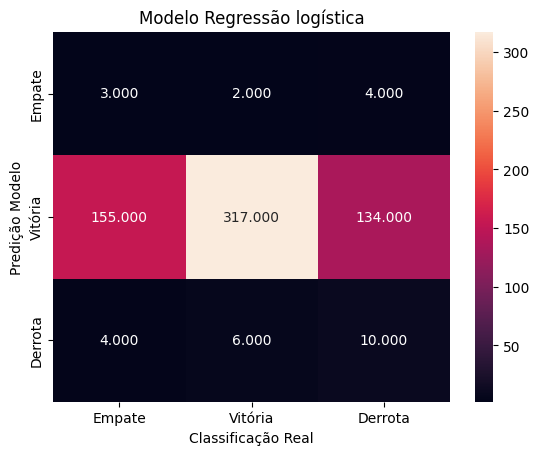

In [17]:
#imprimir a Matriz de Confusão para Regressão Logística
logReg_y_pred = logReg.predict(X_test)

logReg_cm = metrics.confusion_matrix(logReg_y_pred, y_test)

sns.heatmap(logReg_cm, annot=True, fmt='.3f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')

# Oversampling

In [18]:
# Verificando distribuição das variáveis target
target.value_counts()

1    1258
0     674
2     608
Name: classe_resultado, dtype: int64

In [19]:
# Biblioteca para balanceamento de carga.
from imblearn.over_sampling import SMOTE

In [20]:
##### >>>> Solucao do erro da celula abaixo Sujerida pelo Google <<<< #####
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the target variable (target = y)
y_encoded = label_encoder.fit_transform(target)

# Apply SMOTE to the encoded target variable (features = X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, y_encoded)

In [21]:
# Verificando distribuição das variáveis target após balancemaneto por overssample
y_df = y_resampled
y_DF = pd.DataFrame(y_df)
y_DF.value_counts()

0    1258
1    1258
2    1258
dtype: int64

In [22]:
# Divisão do conjunto de dados em treino e teste
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_resampled,
                                                                    y_resampled,
                                                                 test_size=0.25,
                                                                random_state=42)

In [23]:
# Criação de instancia do modelo de regressão logística multinomial
logReg_bal = LogisticRegression(multi_class='multinomial',
                                solver='lbfgs',
                                max_iter=1000,
                                verbose=10)

In [26]:
# Treinamento do modelo
logReg_bal = logReg_bal.fit(X_train_bal, y_train_bal)

# Imprime Acurácia do modelo
print("Acurácia do treinamento: %f" % logReg_bal.score(X_resampled, y_resampled))
print("Acurácia do teste: %f" % logReg_bal.score(X_test_bal, y_test_bal))

Acurácia do treinamento: 0.383943
Acurácia do teste: 0.369703


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


In [29]:
# Salva o modelo
with open('logReg_bal_model.pkl', 'wb') as f:
    pickle.dump(logReg_bal, f)

In [31]:
# Carregue o modelo
with open('logReg_bal_model.pkl', 'rb') as f:
    logReg_bal_loaded = pickle.load(f)

Text(0.5, 1.0, 'Modelo Regressão logística')

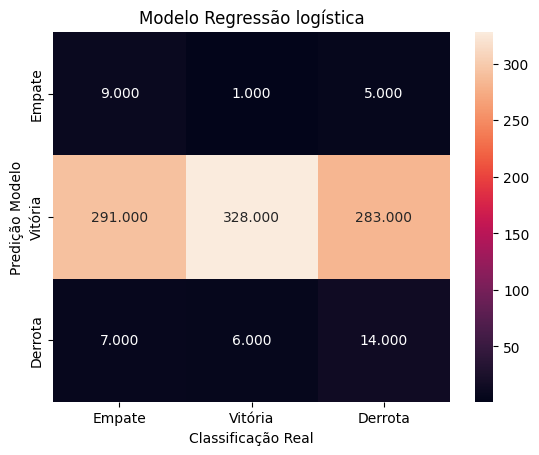

In [32]:
#imprimir a Matriz de Confusão para Regressão Logística
logReg_bal_y_pred = logReg.predict(X_test_bal)

logReg_bal_cm = metrics.confusion_matrix(logReg_bal_y_pred, y_test_bal)

sns.heatmap(logReg_bal_cm, annot=True, fmt='.3f', xticklabels = ["Empate", "Vitória", "Derrota"] , yticklabels = ["Empate", "Vitória", "Derrota"] )

plt.ylabel('Predição Modelo')
plt.xlabel('Classificação Real')
plt.title('Modelo Regressão logística')